<a href="https://colab.research.google.com/github/SasukeUchiha-05/NLP/blob/main/NLP_EXP_6_22BD1A6612_MVS_Karthik_26_03_2025%20-1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install pandas numpy nltk gensim matplotlib seaborn scikit-learn kaggle


In [5]:
!pip install --upgrade --force-reinstall numpy
!pip install --upgrade --force-reinstall pandas


  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.4 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
  Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
  Usin

In [3]:
import pandas as pd

# Load dataset (Make sure the CSV file is in the same directory as your notebook)
df = pd.read_csv("/content/email.csv")

# Display first few rows
print(df.head())

# Check column names
print(df.columns)


  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
Index(['Category', 'Message'], dtype='object')


In [ ]:
pip install gensim

In [6]:
print(df.columns)

Index(['Category', 'Message'], dtype='object')


In [4]:

!pip install --upgrade --force-reinstall numpy==1.23.5



  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.4
    Uninstalling numpy-2.2.4:
      Successfully uninstalled numpy-2.2.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.
jaxlib 0.5.1 requires numpy>=1.25, but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.23.5 which is incompatible.
albucore 0.0.23 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
blosc2 3.2.0 requires numpy>=1.26, but you have numpy 1.23.5 which is incompatible.
chex 0.1.89 requires numpy>=1.24.1, but

In [1]:
!pip uninstall gensim -y
!pip install --no-cache-dir gensim


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 266.8 MB/s eta 0:00:00


In [26]:
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [27]:
# Apply preprocessing
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W+', ' ', text)  # Remove special characters
    words = word_tokenize(text)  # Tokenize
    words = [w for w in words if w not in stopwords.words('english')]  # Remove stopwords
    return words  # Return list of words (Word2Vec needs tokenized sentences)

df["cleaned_message"] = df["Message"].apply(preprocess_text)



# Display cleaned dataa
print(df[["Category", "cleaned_message"]].head())


  Category                                    cleaned_message
0      ham  [go, jurong, point, crazy, available, bugis, n...
1      ham                     [ok, lar, joking, wif, u, oni]
2     spam  [free, entry, 2, wkly, comp, win, fa, cup, fin...
3      ham      [u, dun, say, early, hor, u, c, already, say]
4      ham     [nah, think, goes, usf, lives, around, though]


In [28]:
from gensim.models import Word2Vec

# Create a corpus (list of tokenized messages)
corpus = df["cleaned_message"].tolist()


# Train Word2Vec Model
word2vec_model = Word2Vec(sentences=corpus, vector_size=100, window=5, min_count=1, workers=4)

# Save the model
word2vec_model.save("word2vec_email.model")

# Display example word vector
# print("Example word vector for 'free':\n", word2vec_model.wv["free"])


In [11]:
import numpy as np

def print_raw_embeddings(model):
    words = list(model.wv.index_to_key)  # Get words from the model
    word_vectors = {word: model.wv[word] for word in words[:50]}  # Use first 50 words

    for word, vector in word_vectors.items():
        print(f"{word}: {vector}")

# Print raw embeddings
print_raw_embeddings(word2vec_model)


 : [ 0.02707047  0.25048754  0.06501654  0.09844176 -0.20837435 -0.0274257
  0.041554   -0.45167905  0.01484489  0.12355326  0.4318742   0.18825354
  0.0691932  -0.11860946 -0.2520657   0.07637272 -0.10411817  0.6275838
 -0.29347754  0.467916   -0.03645702 -0.05279731 -0.123718    0.34451026
 -0.05664669  0.19755979  0.34774297 -0.00266372  0.20935607 -0.13376741
 -0.3210248  -0.05285876 -0.00632572  0.7805667   0.11141936 -0.2405973
  0.25706464  0.12501322  0.42453068  0.08292343  0.24504365  0.18859294
 -0.01311025 -0.29644117 -0.38123903  0.1540897  -0.15212488  0.3191258
  0.07691182 -0.15320224 -0.31214496  0.18028373  0.23349915  0.01554775
  0.03490885  0.16769     0.15775494 -0.19644055  0.13103655  0.15410413
  0.18297364  0.19500269 -0.6148935  -0.44798464  0.2947781  -0.20792593
 -0.0248571  -0.1384917   0.31910467 -0.4082012   0.00859759 -0.17115192
 -0.24113414  0.11840129 -0.3600796   0.43879512  0.13207966  0.02225924
  0.09365316 -0.07491457  0.2604604   0.1812095   0.

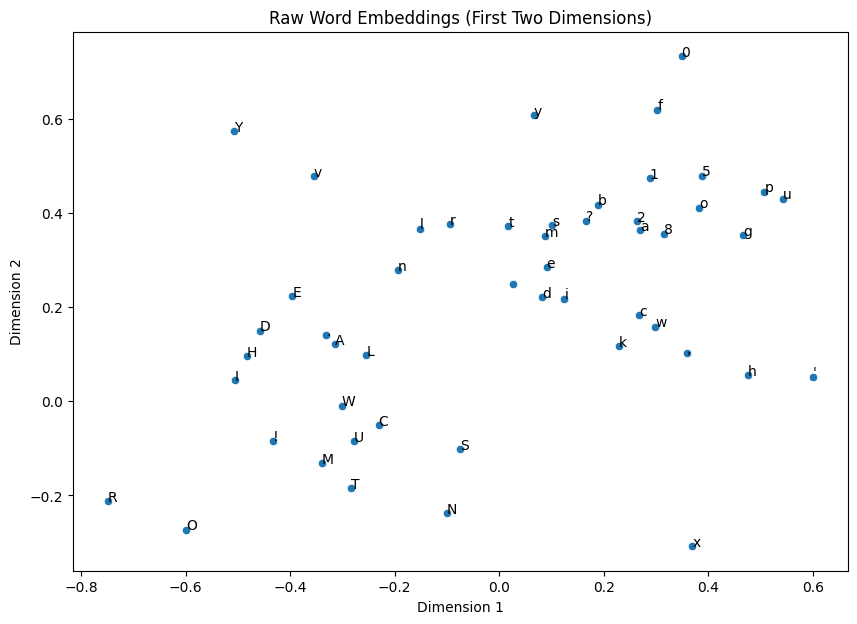

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_raw_embeddings(model):
    words = list(model.wv.index_to_key)  # Get words from the model
    word_vectors = np.array([model.wv[word] for word in words[:50]])  # Use first 50 words

    # Plot raw embeddings (first two dimensions)
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x=word_vectors[:, 0], y=word_vectors[:, 1])

    for i, word in enumerate(words[:50]):  # Annotate first 50 words
        plt.annotate(word, (word_vectors[i, 0], word_vectors[i, 1]))

    plt.title("Raw Word Embeddings (First Two Dimensions)")
    plt.xlabel("Dimension 1")
    plt.ylabel("Dimension 2")
    plt.show()

# Visualize raw embeddings
plot_raw_embeddings(word2vec_model)


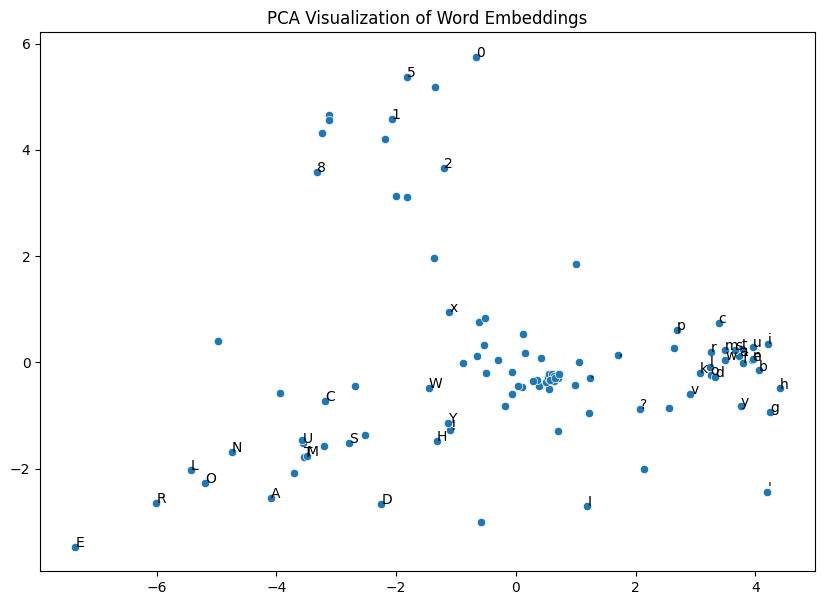

In [13]:
#PCA (Principal Component Analysis): PCA is a technique used for dimensionality reduction.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Function to visualize embeddings using PCA
def plot_pca_embeddings(model):
    words = list(model.wv.index_to_key)  # Get words from the model
    word_vectors = np.array([model.wv[word] for word in words])

    # Apply PCA
    pca = PCA(n_components=2)
    word_vectors_pca = pca.fit_transform(word_vectors)

    # Plot embeddings
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x=word_vectors_pca[:, 0], y=word_vectors_pca[:, 1])
    for i, word in enumerate(words[:50]):  # Show first 50 words
        plt.annotate(word, (word_vectors_pca[i, 0], word_vectors_pca[i, 1]))
    plt.title("PCA Visualization of Word Embeddings")
    plt.show()

# Visualize using PCA
plot_pca_embeddings(word2vec_model)



/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


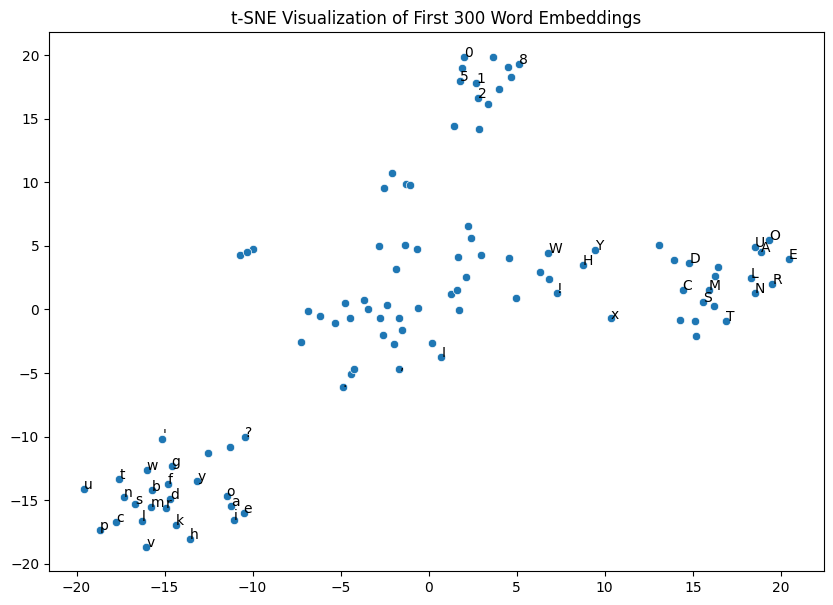

In [14]:
#t-SNE (t-distributed Stochastic Neighbor Embedding) - designed to preserve the local structure of data
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to visualize embeddings using t-SNE for first 300 words
def plot_tsne_embeddings_300(model):
    words = list(model.wv.index_to_key)[:300]  # Get first 300 words
    word_vectors = np.array([model.wv[word] for word in words])

    # Apply t-SNE
    tsne = TSNE(n_components=2, perplexity=10, n_iter=500, random_state=42)
    word_vectors_tsne = tsne.fit_transform(word_vectors)

    # Plot embeddings
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x=word_vectors_tsne[:, 0], y=word_vectors_tsne[:, 1])

    for i, word in enumerate(words[:50]):  # Annotate first 50 words for readability
        plt.annotate(word, (word_vectors_tsne[i, 0], word_vectors_tsne[i, 1]))

    plt.title("t-SNE Visualization of First 300 Word Embeddings")
    plt.show()

# Visualize using t-SNE for first 300 words
plot_tsne_embeddings_300(word2vec_model)


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


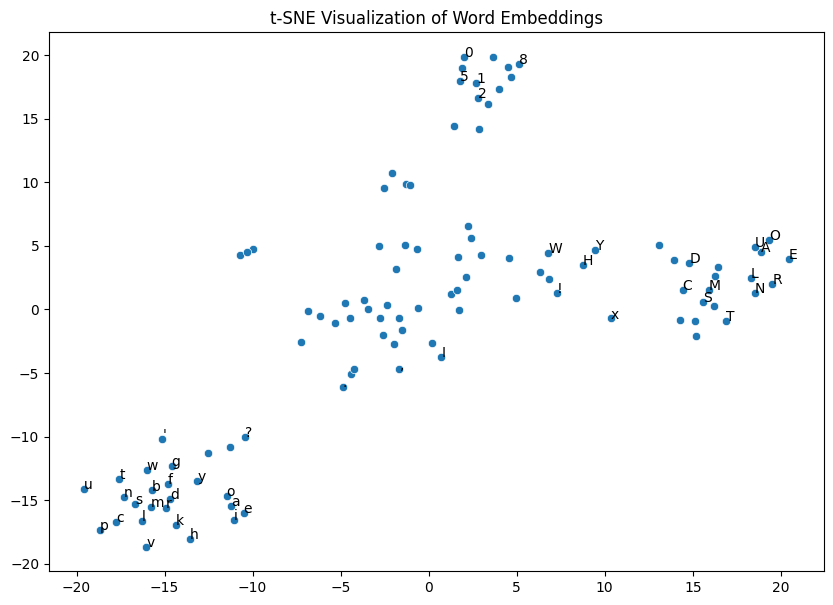

In [15]:

from sklearn.manifold import TSNE

# Function to visualize embeddings using t-SNE
def plot_tsne_embeddings(model):
    words = list(model.wv.index_to_key)  # Get words from the model
    word_vectors = np.array([model.wv[word] for word in words])

    # Apply t-SNE
    tsne = TSNE(n_components=2, perplexity=10, n_iter=500, random_state=42)

    word_vectors_tsne = tsne.fit_transform(word_vectors)

    # Plot embeddings
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x=word_vectors_tsne[:, 0], y=word_vectors_tsne[:, 1])
    for i, word in enumerate(words[:50]):  # Show first 50 words
        plt.annotate(word, (word_vectors_tsne[i, 0], word_vectors_tsne[i, 1]))
    plt.title("t-SNE Visualization of Word Embeddings")
    plt.show()

# Visualize using t-SNE
plot_tsne_embeddings(word2vec_model)


In [30]:
if "free" in word2vec_model.wv:
    print("Words similar to 'free':", word2vec_model.wv.most_similar("free", topn=5))
else:
    print("'free' is not in the vocabulary. Here are some sample words:")
    print(list(word2vec_model.wv.index_to_key)[:20])  # Print first 20 words in vocabulary


Words similar to 'free': [('reply', 0.9997574687004089), ('txt', 0.999747633934021), ('text', 0.9997325539588928), ('2', 0.9997255802154541), ('4', 0.999707043170929)]


In [22]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# Function to get sentence embeddings (average word vectors)
def get_sentence_vector(sentence, model):
    words = sentence.split()
    vectors = [model.wv[word] for word in words if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

# Prepare feature vectors for emails
X = np.array([get_sentence_vector(msg, word2vec_model) for msg in df["cleaned_message"]])
y = np.where(df["Category"] == "spam", 1, 0)  # Convert labels: spam=1, ham=0

# Train a classifier
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Test on a new email
new_email = "Congratulations! You won a free iPhone. Claim now!"
new_vector = get_sentence_vector(new_email, word2vec_model)
prediction = clf.predict([new_vector])

print(f"Prediction: {'Spam' if prediction[0] == 1 else 'Ham'}")


Prediction: Ham
